# <span style="color:red">**JUEGOS OLIMPICOS**</span>

**ABSTRACT**:

El desempeño de los atletas olímpicos está influenciado por una variedad de factores, entre ellos, las características físicas como la edad, peso y altura. Este proyecto tiene como objetivo analizar cómo estas variables están asociadas con la participación en deportes específicos, considerando también el género y el contexto de cada disciplina.
La motivación principal es entender qué atributos físicos son más comunes en los atletas que participan en diferentes tipos de deportes, lo que podría ser de gran utilidad para analistas deportivos, entrenadores y comités olímpicos interesados en optimizar la selección y entrenamiento de atletas.
A través de un análisis exploratorio de datos, visualizaciones y un modelo de Machine Learning, se buscará responder preguntas como:

- ¿Qué características físicas son más comunes en deportes de resistencia, fuerza y precisión?
- ¿Cómo varían estas características entre hombres y mujeres?
- ¿Qué patrones físicos se observan en los atletas de diferentes disciplinas?
Este análisis permitirá identificar patrones y tendencias que podrían ser utilizados para mejorar estrategias de entrenamiento y selección de atletas en función de las características físicas requeridas por cada deporte.

--

**INTRODUCCIÓN DATASET**: 

El dataset contiene información detallada sobre los atletas que han participado en los Juegos Olímpicos a lo largo de la historia. Incluye datos como el nombre del atleta, género, edad, altura, peso, país, deporte y evento, abarcando un rango de años desde 1896 hasta el 2016.
Este conjunto de datos es ideal para analizar cómo las características físicas de los atletas están asociadas con su participación en diferentes deportes, permitiendo identificar patrones específicos en disciplinas como deportes de resistencia, fuerza y precisión.

--

**CONTEXTO Y PROBLEMATICA COMERCIAL**:

Los Juegos Olímpicos son uno de los eventos deportivos más importantes y prestigiosos a nivel mundial, donde atletas de diferentes países compiten en una amplia variedad de disciplinas. Cada deporte tiene requisitos físicos únicos que influyen en el desempeño de los atletas, como la resistencia, la fuerza o la precisión.
Comprender cómo las características físicas están asociadas con la participación en deportes específicos es crucial para entrenadores, analistas deportivos y comités olímpicos. Este conocimiento puede ayudar a optimizar estrategias de selección y entrenamiento, maximizando las probabilidades de éxito en competencias internacionales.
Además, este análisis tiene implicaciones comerciales, ya que los países invierten significativamente en el desarrollo de sus atletas y buscan maximizar su rendimiento en los Juegos Olímpicos.

--

**OBJETIVO/PROBLEMATICA PRINCIPAL**: 
(Enfocado en clasificación) 

Analizar cómo las características físicas (edad, altura, peso) están asociadas con la participación en deportes específicos, utilizando un modelo de Machine Learning para identificar patrones en disciplinas como deportes de resistencia, fuerza y precisión.


---

**FUENTE DE DATOS**: El dataset utilizado en este proyecto fue obtenido de *[Kaggle](https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data/data)*

---

# <span style="color:salmon">*Análisis Exploratorio de Datos (EDA):*</span>


In [1]:
import pandas as pd
import os
import numpy as np
import missingno as msno
from fancyimpute import IterativeImputer
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
ruta= os.getcwd()
file_name=[x for x in os.listdir() if 'olympic_games' in x][0]
df=pd.read_csv(f"{ruta}/{file_name}",sep=";",encoding='utf-8')

In [2]:
df.head()

,N,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Año desde que empiezan los registros del dataset

df['Year'].min()

np.int64(1896)

In [4]:
# Último año de que terminan los registros del dataset

df['Year'].max()

np.int64(2016)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       70000 non-null  int64  
 1   ID      70000 non-null  int64  
 2   Name    70000 non-null  object 
 3   Sex     70000 non-null  object 
 4   Age     67268 non-null  float64
 5   Height  53746 non-null  float64
 6   Weight  52899 non-null  float64
 7   Team    70000 non-null  object 
 8   NOC     70000 non-null  object 
 9   Games   70000 non-null  object 
 10  Year    70000 non-null  int64  
 11  Season  70000 non-null  object 
 12  City    70000 non-null  object 
 13  Sport   70000 non-null  object 
 14  Event   70000 non-null  object 
 15  Medal   9690 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 8.5+ MB


In [6]:
# No hay registros duplicados

duplicados = df.duplicated()
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 0


<Axes: >

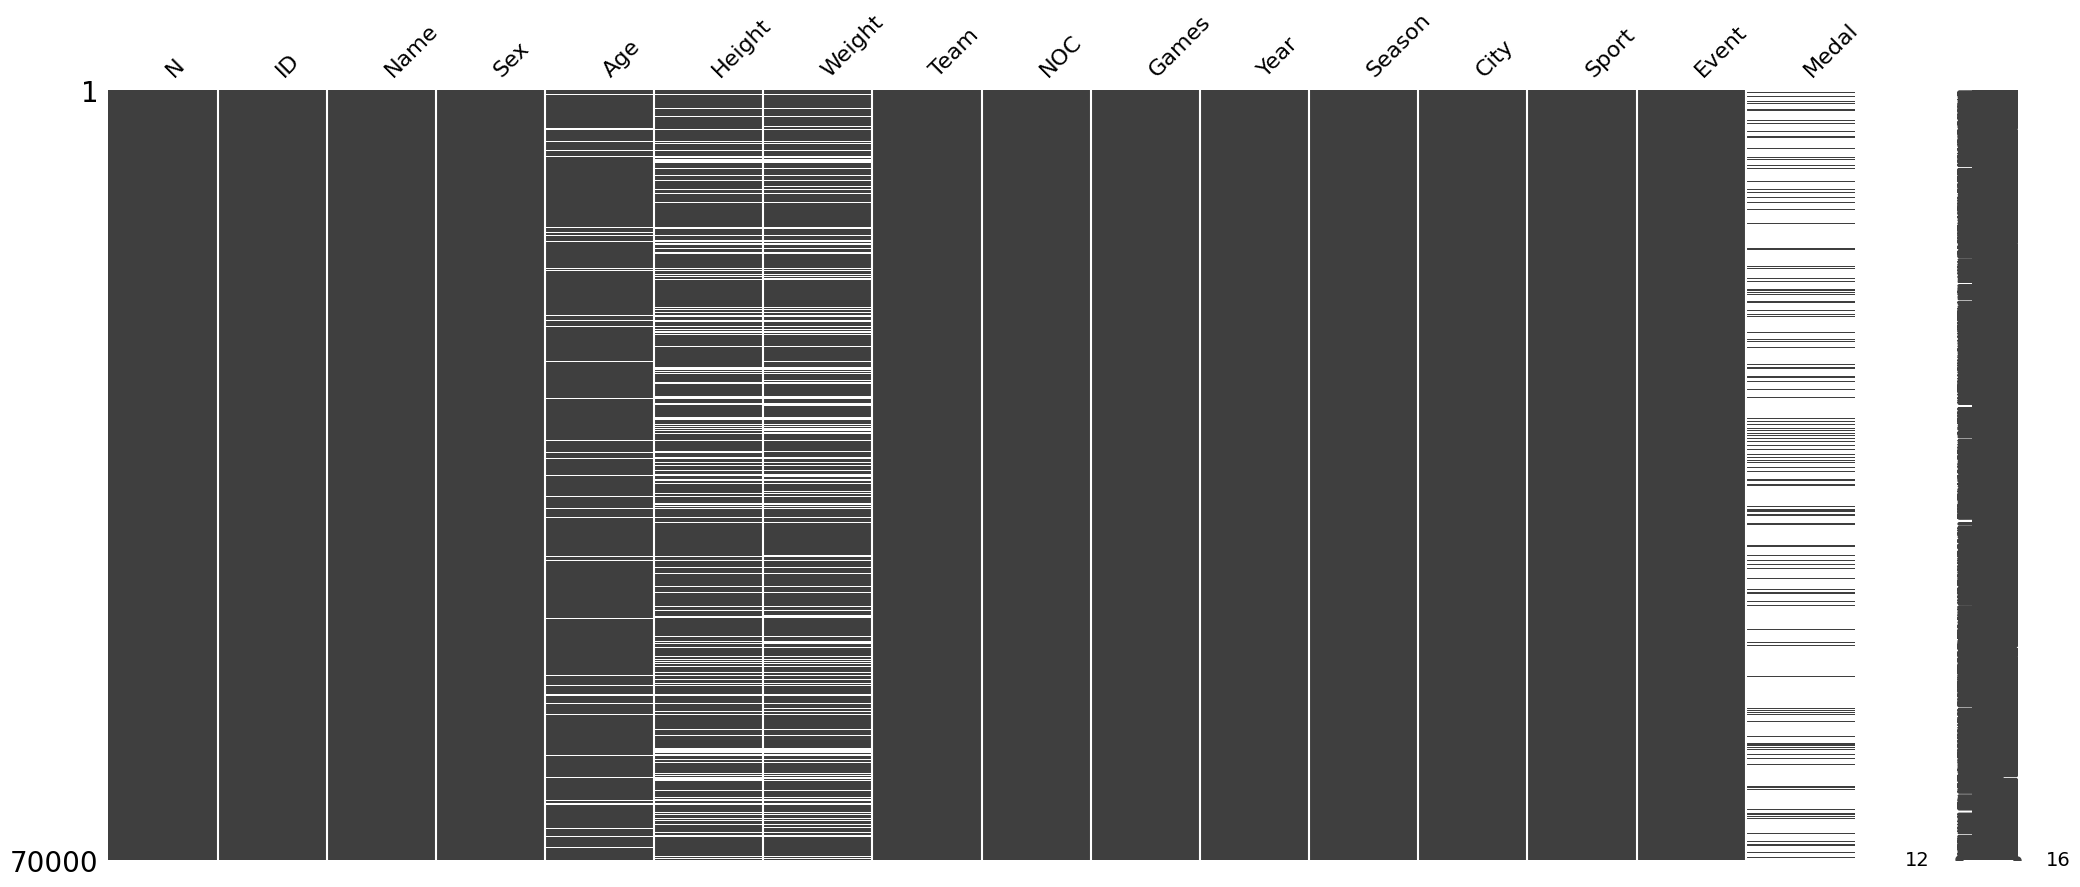

In [7]:
# Revisar Nulos

msno.matrix(df)

In [8]:
# Nulos en las variables: Edad, Altura, Peso y Medalla. 
# Medal tiene la mayor cantidad de nulos. 

df[['Age', 'Height', 'Weight','Medal']].isnull().sum()

Age        2732
Height    16254
Weight    17101
Medal     60310
dtype: int64

**IMPUTACIÓN DE NULOS:**

In [9]:
df['Medal'] = df['Medal'].fillna("NoMedal")
df.Medal.unique()

## La columna Medal ya no tiene valores nulos, pues los "Nan" correspondian a atletas que no ganaron medalla, así que fue reemplazado por "NoMedal"
# Quedan nulos en Age, Height y Weight.

array(['NoMedal', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [10]:
# Paso a ordinal la variable Sex (categorica), así la puedo usar en la imputación predictiva, para las variables Age, Height y Weight.

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [11]:
df.head()

,N,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_M
0,1,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,True
1,2,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,True
2,3,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,True
3,4,4,Edgar Lindenau Aabye,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True
4,5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedal,False


In [12]:
# Ahora si, Imputación predictiva: 

from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
columns_to_impute = ['Age', 'Height', 'Weight','Sex_M']
data_to_impute = df[columns_to_impute]
imputed_data= mice_impute.fit_transform(data_to_impute)
imputed_data= pd.DataFrame(imputed_data)
imputed_data.isnull().sum()


0    0
1    0
2    0
3    0
dtype: int64

In [13]:
imputed_data

,0,1,2,3
0,24.0,180.000000,80.000000,1.0
1,23.0,170.000000,60.000000,1.0
2,24.0,178.630878,75.016555,1.0
3,34.0,179.577261,78.379646,1.0
4,21.0,185.000000,82.000000,0.0
...,...,...,...,...
69995,19.0,178.157687,73.335010,1.0
69996,19.0,178.157687,73.335010,1.0
69997,26.0,170.000000,65.000000,1.0
69998,30.0,170.000000,65.000000,1.0


In [14]:
df['Age']= imputed_data[0] 
df['Height']= imputed_data[1] 
df['Weight']= imputed_data[2] 
print(df.Age.isnull().sum())
print(df.Height.isnull().sum())
print(df.Weight.isnull().sum())

0
0
0


In [15]:
# Ya no quedan valores nulos en el dataset

df.isnull().sum()

N         0
ID        0
Name      0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Sex_M     0
dtype: int64

**INGENIERIA DE ATRIBUTOS:**

In [16]:
# Agrupar deportes, para facilitar el analisis

Sport_Group = {
    'Deportes de resistencia': [
        'Athletics', 'Cycling', 'Triathlon', 'Cross Country Skiing', 'Nordic Combined',
        'Swimming', 'Modern Pentathlon', 'Rowing', 'Canoeing', 'Marathon',
        'Alpine Skiing', 'Biathlon', 'Freestyle Skiing', 'Military Ski Patrol',
        'Short Track Speed Skating', 'Ski Jumping', 'Snowboarding', 'Speed Skating',
        'Synchronized Swimming'
    ],
    'Deportes de fuerza': [
        'Weightlifting', 'Tug-Of-War', 'Softball', 'Baseball', 'Rugby', 'Rugby Sevens',
        'Bobsleigh', 'Luge', 'Skeleton', 'Ice Hockey', 'Handball', 'Hockey', 'Football',
        'Basketball', 'Water Polo', 'Volleyball', 'Beach Volleyball', 'Wrestling',
        'Polo', 'Cricket', 'Croquet'
    ],
    'Deportes de precisión': [
        'Archery', 'Shooting', 'Fencing', 'Golf', 'Jeu De Paume', 'Racquets',
        'Rhythmic Gymnastics', 'Roque', 'Equestrianism', 'Basque Pelota', 'Table Tennis',
        'Tennis', 'Badminton', 'Art Competitions', 'Diving', 'Figure Skating',
        'Gymnastics', 'Motorboating', 'Sailing', 'Trampolining'
    ]
}

In [17]:
def map_sport_to_group(sport):
    for group, sports in Sport_Group.items():
        if sport in sports:
            return group
    return 'Otros'  # Para deportes que no encajen en ningún grupo

# Nueva columna con los grupos de deporte

df['Sport_Group'] = df['Sport'].apply(map_sport_to_group)

In [18]:
df['Sport_Group'].value_counts()

Sport_Group
Deportes de resistencia    32950
Deportes de precisión      20739
Deportes de fuerza         13334
Otros                       2977
Name: count, dtype: int64

In [19]:
df.head()

,N,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_M,Sport_Group
0,1,1,A Dijiang,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,True,Deportes de fuerza
1,2,2,A Lamusi,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,True,Otros
2,3,3,Gunnar Nielsen Aaby,24.0,178.630878,75.016555,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,True,Deportes de fuerza
3,4,4,Edgar Lindenau Aabye,34.0,179.577261,78.379646,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True,Deportes de fuerza
4,5,5,Christine Jacoba Aaftink,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedal,False,Deportes de resistencia


---

**DISTRIBUCIÓN DE LAS EDADES, PESO y ALTURA**

El rango de **edades** de los atletas va de 11 a 88 años.
Sin embargo, la mayoría de los atletas se concentran entre los 22 y 28 años, lo que indica que esta es la edad más común para competir en los Juegos Olímpicos.

El **peso** va desde los 25 Kg a 214 Kg, siendo el rango más común, entre 63 Kg y 78 Kg.

En cuanto a la **altura**, hay atletas desde 127 CM hasta 226 CM, pero el más común está en el rango de 170 KG y 180 KG. 

In [20]:
df[['Age','Weight','Height']].describe()

,Age,Weight,Height
count,70000.000000,70000.000000,70000.000000
mean,25.665165,71.712596,176.033676
std,6.359702,12.816091,9.330925
min,11.000000,25.000000,127.000000
25%,22.000000,63.000000,170.000000
50%,25.000000,73.000000,178.000000
75%,28.000000,78.000000,180.239729
max,88.000000,214.000000,226.603853


<Axes: ylabel='Frequency'>

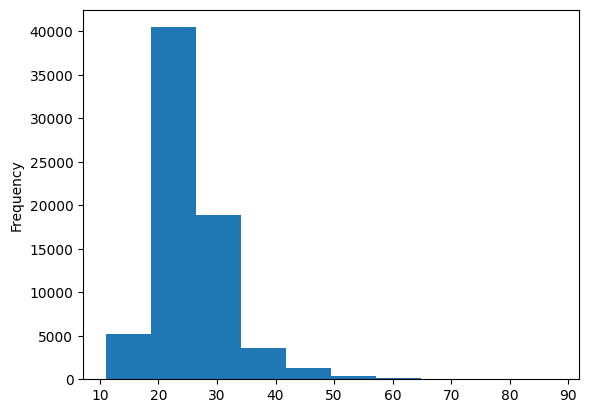

In [21]:
df['Age'].plot(kind='hist')


<Axes: ylabel='Frequency'>

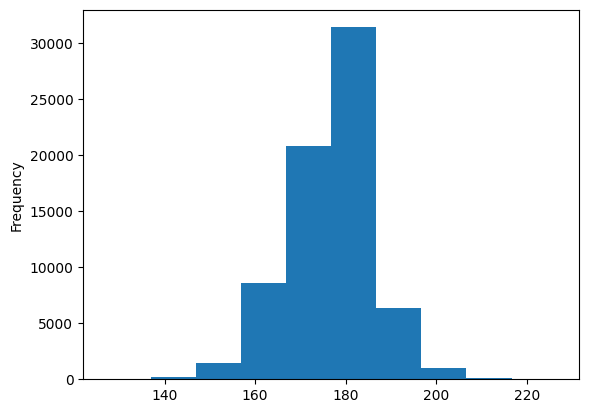

In [22]:
df['Height'].plot(kind='hist')


<Axes: ylabel='Frequency'>

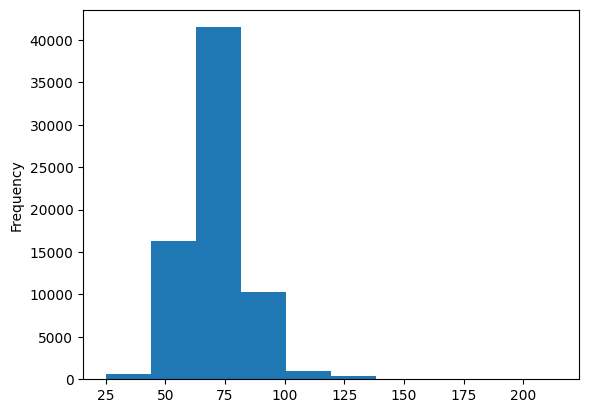

In [23]:
df['Weight'].plot(kind='hist')

In [24]:
df['Medal'].value_counts()

Medal
NoMedal    60310
Gold        3292
Bronze      3208
Silver      3190
Name: count, dtype: int64

In [50]:
# Cantidad de medallas ganadas en cada grupo de deporte

pd.crosstab(df.Sport_Group, df.Medal)

Medal,Bronze,Gold,NoMedal,Silver
Sport_Group,,,,
Deportes de fuerza,968,992,10332,1042
Deportes de precisión,771,823,18371,774
Deportes de resistencia,1269,1367,29059,1255
Otros,200,110,2548,119


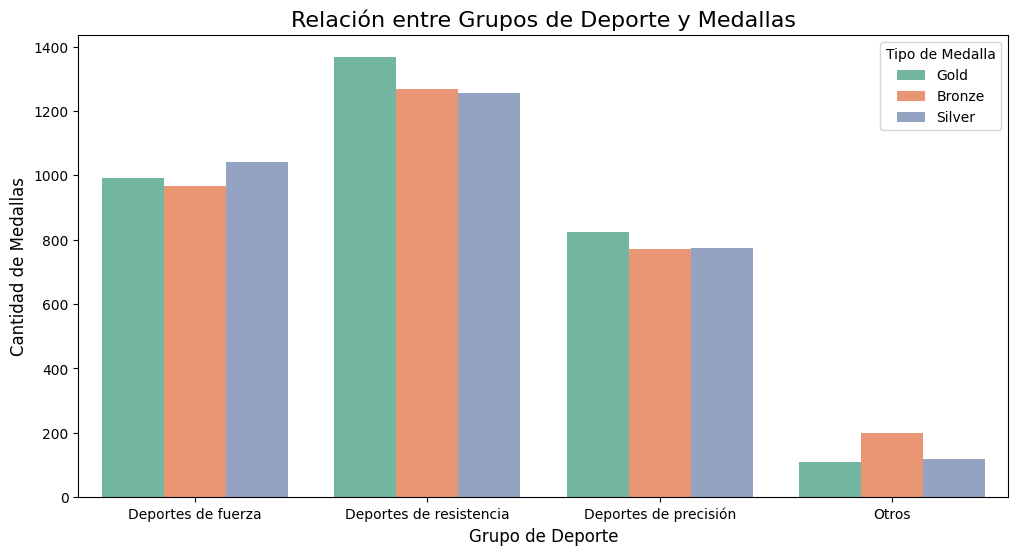

In [32]:
df_medallas = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_medallas, x='Sport_Group', hue='Medal', palette='Set2')
plt.title('Relación entre Grupos de Deporte y Medallas', fontsize=16)
plt.xlabel('Grupo de Deporte', fontsize=12)
plt.ylabel('Cantidad de Medallas', fontsize=12)
plt.legend(title='Tipo de Medalla', fontsize=10)

---

La mayoría de los atletas que ganan medallas tienen entre 20 y 30 años, con una mediana cercana a los 25 años.

La distribución de la edad es consistente entre los tres tipos de medallas, lo que sugiere que la edad no es un factor determinante para el tipo de medalla ganada.

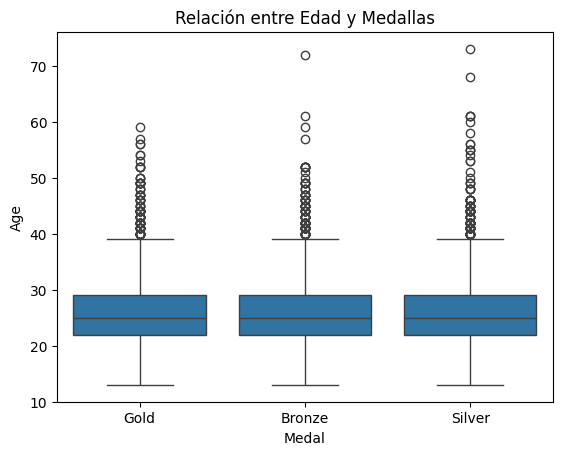

In [35]:
sns.boxplot(data=df_medallas, x='Medal', y='Age')
plt.title('Relación entre Edad y Medallas')
plt.show()

---

**Relación fuerte:**
Existe una relación lineal fuerte entre Altura y Peso (0.8). Lo que indica que los atletas más altos tienden a pesar más. Esta relación es esperada, ya que la altura y el peso suelen estar relacionados en términos físicos.

**Relación débil:**
La edad tiene una relación más débil con Altura (0.098) y Peso (0.19). Lo que indica que la edad no está fuertemente asociada con estas características físicas.

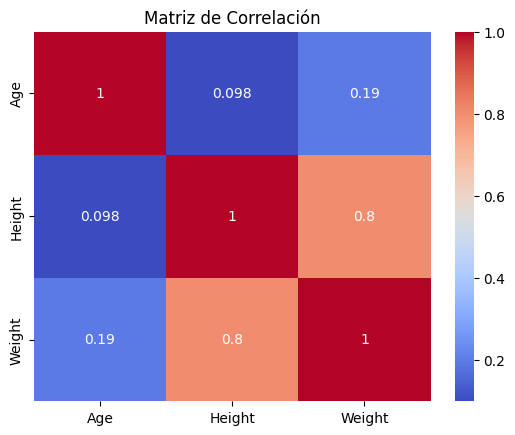

In [36]:
corr_matrix = df_medallas[['Age', 'Height', 'Weight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

---

- **Deportes de fuerza:**
Los atletas de este grupo tienen un rango de peso más alto en comparación con otros grupos, incluso para alturas similares.
Esto es consistente con la naturaleza de estos deportes, que requieren mayor masa muscular y fuerza física.

- **Deportes de resistencia:**
Los atletas de resistencia tienen un rango de peso más bajo en relación con su altura, lo que refleja la necesidad de un cuerpo más ligero para optimizar el rendimiento en actividades como correr, nadar o andar en bicicleta.
Este grupo tiene una distribución más amplia en términos de altura, lo que sugiere que hay más diversidad en las características físicas de los atletas.

- **Deportes de precisión:**
Los atletas de precisión tienen un rango de peso y altura más moderado, con menos extremos en comparación con los deportes de fuerza o resistencia.
Esto refleja la importancia de la coordinación y el control en lugar de la fuerza o la resistencia extrema.

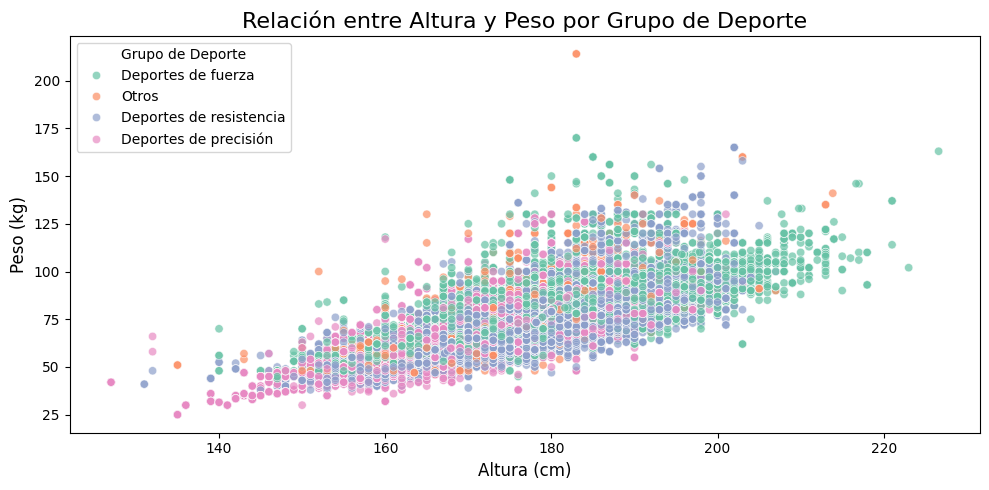

In [58]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='Height',
    y='Weight',
    hue='Sport_Group',
    alpha=0.7,
    palette='Set2'
)
plt.title('Relación entre Altura y Peso por Grupo de Deporte', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.legend(title='Grupo de Deporte', fontsize=10)
plt.tight_layout()
plt.show()

---

Los hombres tienden a ser más altos y pesados que las mujeres, con una mayor dispersión en las características físicas.
Las mujeres tienen un rango más estrecho de altura y peso, lo que refleja diferencias biológicas y de participación en deportes.

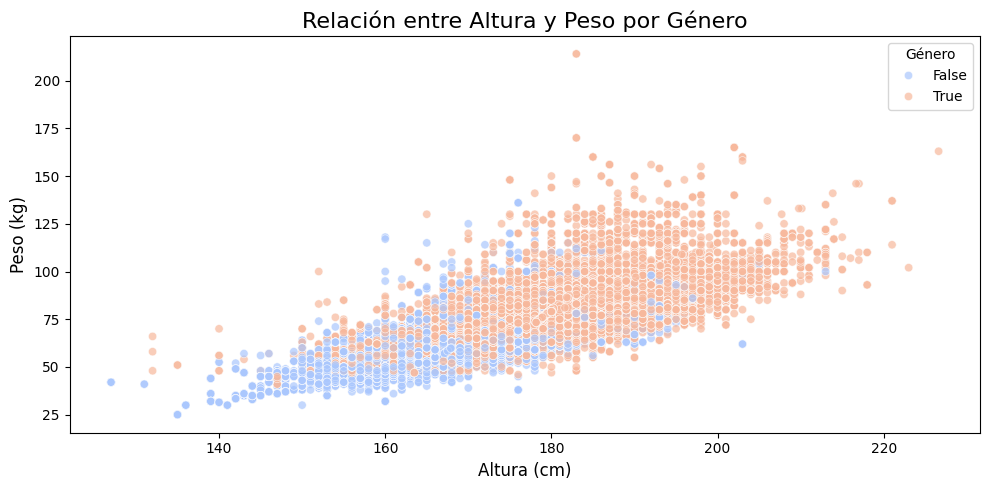

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='Height',
    y='Weight',
    hue='Sex_M',
    alpha=0.7,
    palette='coolwarm'
)

plt.title('Relación entre Altura y Peso por Género', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.legend(title='Género', fontsize=10)
plt.tight_layout()
plt.show()

In [52]:
# Cantidad de medallas ganadas según genero, donde False = Mujer y True = Hombre

pd.crosstab(df.Sex_M, df.Medal)

Medal,Bronze,Gold,NoMedal,Silver
Sex_M,,,,
False,838,906,15524,855
True,2370,2386,44786,2335


---

- Los hombres son consistentemente más altos que las mujeres en todos los grupos de deportes.
- Los deportes de fuerza y resistencia tienen una mayor dispersión en la altura, mientras que los deportes de precisión son más homogéneos.

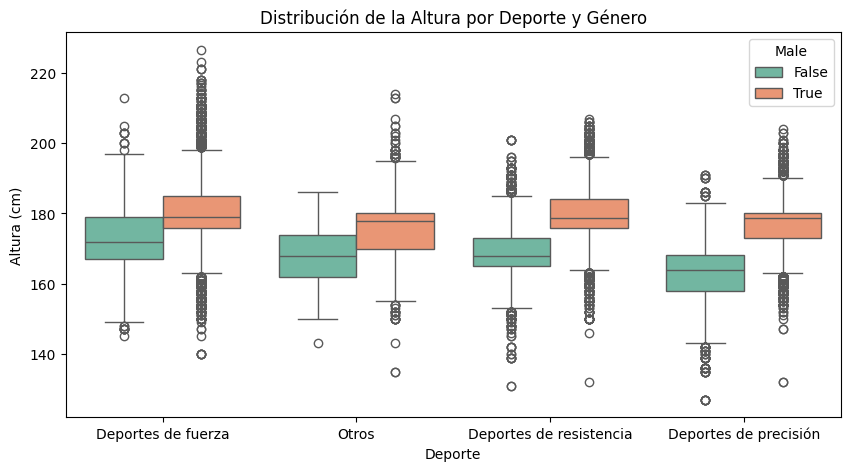

In [44]:
# Boxplot de altura en cada grupo de deporte y género

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sport_Group', y='Height', hue='Sex_M', palette='Set2')
plt.title('Distribución de la Altura por Deporte y Género')
plt.xlabel('Deporte')
plt.ylabel('Altura (cm)')
plt.legend(title='Male')
plt.show()

---

- Los hombres pesan más que las mujeres en todos los grupos de deportes.
- Los deportes de fuerza tienen los pesos más altos, mientras que los deportes de precisión tienen los pesos más bajos.

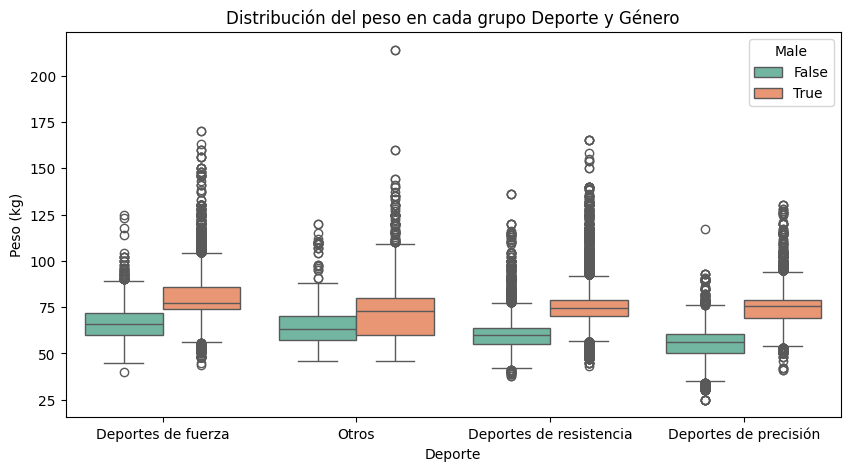

In [45]:
# Boxplot de peso en cada grupo de deporte y género

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sport_Group', y='Weight', hue='Sex_M', palette='Set2')
plt.title('Distribución del peso en cada grupo Deporte y Género')
plt.xlabel('Deporte')
plt.ylabel('Peso (kg)')
plt.legend(title='Male')
plt.show()

---

- Las edades están distribuidas de manera similar entre hombres y mujeres, con medianas cercanas en todos los grupos.
- Los deportes de precisión tienen una mediana de edad más alta, lo que podría reflejar la necesidad de experiencia y control en estas disciplinas.

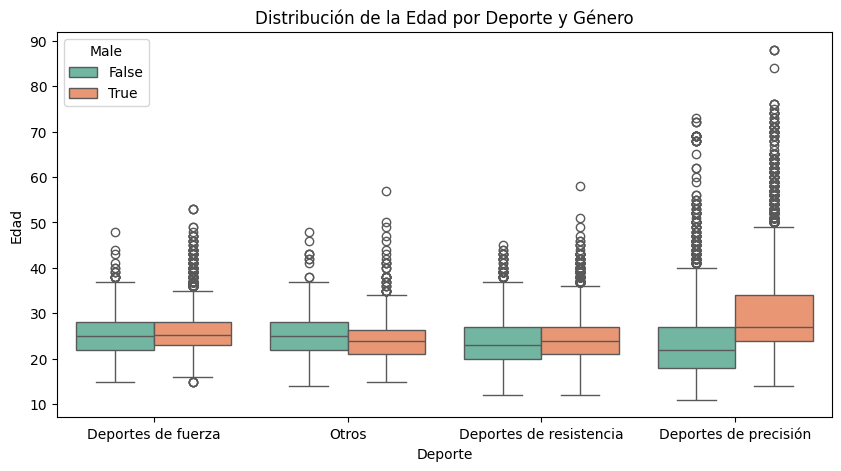

In [51]:
# Boxplot de edad en cada grupo de deporte y género

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sport_Group', y='Age', hue='Sex_M', palette='Set2')
plt.title('Distribución de la Edad por Deporte y Género')
plt.xlabel('Deporte')
plt.ylabel('Edad')
plt.legend(title='Male')
plt.show()

---

**PREDICCIÓN**

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NOC'] = le.fit_transform(df['NOC'])

**RAMDOM FOREST**

In [61]:
from sklearn.model_selection import train_test_split
X = df[['Sex_M', 'Age', 'Height', 'Weight','NOC']]
Y = df['Sport_Group']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [68]:
X_train.shape, X_test.shape

((49000, 5), (21000, 5))

In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')

In [87]:
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

     Deportes de fuerza       0.55      0.11      0.19      4056
  Deportes de precisión       0.61      0.42      0.50      6233
Deportes de resistencia       0.55      0.89      0.68      9820
                  Otros       1.00      0.01      0.02       891

               accuracy                           0.56     21000
              macro avg       0.68      0.36      0.35     21000
           weighted avg       0.59      0.56      0.50     21000



In [82]:
model.feature_importances_

array([0.05027064, 0.45053427, 0.23614606, 0.24535744, 0.01769159])

In [83]:
len(model.feature_importances_)

5

In [84]:
len(X_train.columns)

5

Text(0.5, 0, 'Random Forest Feature Importance')

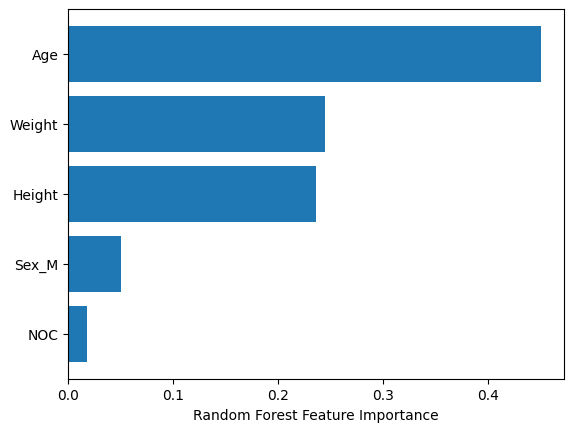

In [85]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [117]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50, 
    scoring='f1_weighted', 
    cv=5,  
    verbose=2, 
    random_state=42,  
    n_jobs=-1 
)

In [118]:
# Ajustar el modelo con RandomizedSearchCV
random_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntaje:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.4s